In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'


In [4]:
#Loading CSV File and printing 1st 10 records
df = pd.read_csv(filepath)
df.head(10)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
#Q1 - Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

datatype = df.dtypes
datatype

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [21]:
#Q2 - Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

df.dropna(columns=['Unnamed: 0','id'], inplace=True)
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13


In [23]:
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bathrooms : 10


In [25]:
#Q3 - Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.


Floor_Counts = df['floors'].to_frame().value_counts()
Floor_Counts

floors
1.0       10680
2.0        8241
1.5        1910
3.0         613
2.5         161
3.5           8
dtype: int64

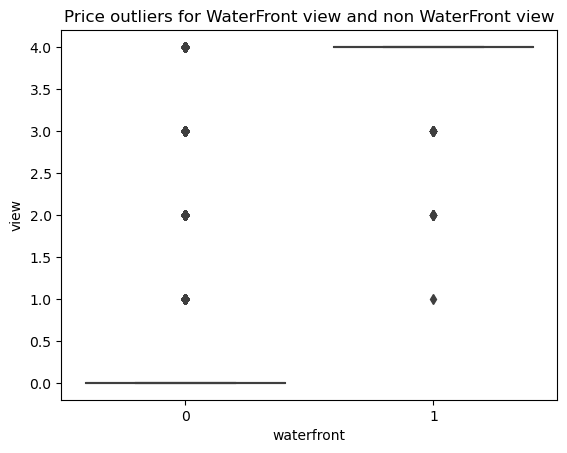

In [28]:
#Q4 -Use the function boxplot in the seaborn library to determine whether houses with a waterfront view 
#or without a waterfront view have more price outliers. Take a screenshot of your code and boxplot. 
#You will need to submit the screenshot for the final project.

x=df['waterfront']
y=df['view']
sns.boxplot(x=x,y=y, data=df)
plt.title("Price outliers for WaterFront view and non WaterFront view")
plt.show()


(0.0, 8081250.0)

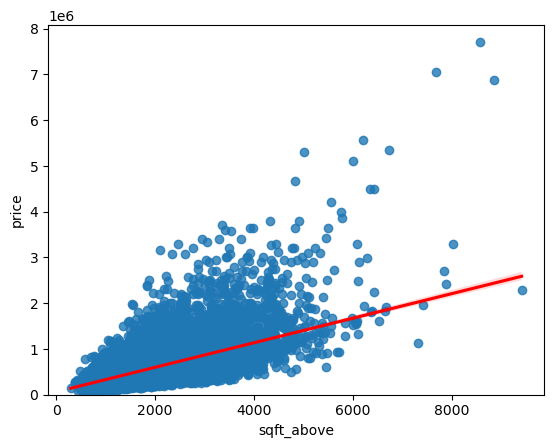

In [29]:
#Q5 - Use the function regplot in the seaborn library to determine if the feature sqft_above 
#is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. 
#You will need to submit the screenshot for the final project.


sns.regplot(x='sqft_above',y='price', data=df, line_kws={"color":"red"})
plt.ylim(0,)

In [30]:
#Q6 - Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 
#Take a screenshot of your code and the value of the R^2. 
#You will need to submit it for the final project.

X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.4928532179037931

In [33]:


#Firstly we will round off all column values to nearest 2 decimal places.
df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]] = np.round(df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]], 2)
print(df.head())


              date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0       3.0       1.00         1180      5650   
1  20141209T000000  538000.0       3.0       2.25         2570      7242   
2  20150225T000000  180000.0       2.0       1.00          770     10000   
3  20141209T000000  604000.0       4.0       3.00         1960      5000   
4  20150218T000000  510000.0       3.0       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0     

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [38]:
#filling the bedrooms and bathrooms null values with their mean colum values
mean_bedrooms = df['bedrooms'].astype('float').mean(axis=0)
df['bedrooms'].replace(np.nan,mean_bedrooms,inplace=True)

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [40]:
mean_bathrooms = df['bathrooms'].astype('float').mean(axis=0)
df['bathrooms'].replace(np.nan,mean_bathrooms,inplace=True)

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [42]:
#Q7 - Fit a linear regression model to predict the 'price' using the list of features:
#features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"] 
#Then calculate the R^2. Take a screenshot of your code and the value of the R^2. 
#You will need to submit it for the final project.

# Y  will hold similar value as mentioned in previous cell
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm = LinearRegression()
lm.fit(Z,Y)
lm.score(Z,Y)


0.6577303430285641

In [51]:
from sklearn.metrics import r2_score
#Q8- Use the list to create a pipeline object to predict the 'price',
#fit the object using the features in the list features, and calculate the R^2. 
#Take a screenshot of your code and the value of the R^2. 
#You will need to submit it for the final project.


Y = df['price']
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
    

0.7509980441771777


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

done
number of test samples: 3242
number of training samples: 18371


In [54]:
#Q - 9 = Create and fit a Ridge regression object using the training data, 
#set the regularization parameter to 0.1, and calculate the R^2 using the test data. 
#Take a screenshot of your code and the value of the R^2. 
#You will need to submit it for the final project.


from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6479628426763497


In [56]:
#Q-10 Perform a second order polynomial transform on both the training data and testing data. 
#Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, 
#and calculate the R^2 utilising the test data provided. 
#Take a screenshot of your code and the R^2. You will need to submit it for the final project.

pr=PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr,y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test, y_hat))

0.7002711494209153
